# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Práctica Calificada V</font></h1>
<h1><font color="#7F000E" size=4>Fecha: 27/02/2026</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>


### Ejercicio 1: Propensión de Compra con Redes Neuronales y Análisis de Elevación (10 puntos)

#### Contexto Empresarial

East–West Airlines se ha asociado con la compañía de telefonía móvil Telcon para vender sus servicios por correo directo. El archivo `EastWestAirlinesNN.csv` contiene un subconjunto de una muestra de datos de quienes ya han recibido una oferta de prueba.  East–West Airlines busca optimizar su campaña de marketing directo para contratos de telefonía. Solo el **13%** de los clientes acepta la oferta (`Phone_Sale = 1`). Debido al costo de enviar correos físicos, la empresa no puede contactar a todos; necesita priorizar a los clientes con mayor probabilidad de conversión.

#### Instrucciones

#### 1. Preprocesamiento Avanzado y Feature Engineering
*   **Tratamiento de Variables:** Convierte variables categóricas en *dummies*. Escala todas las variables numéricas al rango [0, 1] usando `MinMaxScaler`.
*   **Desequilibrio de Clases:** Dado que solo el 13% compró el servicio, explica por qué usar "Accuracy" como métrica principal sería un error en este caso. 
*   **Partición:** Divide los datos en **60% entrenamiento** y **40% validación**.

#### 2. Arquitectura de la Red: El Impacto de la Complejidad
Deberás comparar tres modelos de Redes Neuronales (MLPRegressor o MLPClassifier):
1.  **Modelo A (Underfitting):** 1 capa oculta con **1 solo nodo**.
2.  **Modelo B (Base):** 1 capa oculta con **5 nodos**.
3.  **Modelo C (Deep & Regularized):** 2 capas ocultas con **(10, 5) nodos**, utilizando una penalización L2 ($\alpha = 0.01$) para controlar el sobreajuste.

#### 3. Evaluación Mediante Decile Lift Charts
Para cada modelo, genera un **Decile Lift Chart** para el conjunto de validación.
*   **Cálculo:** Ordena las predicciones de mayor a menor probabilidad, divide en 10 grupos (deciles) y calcula cuánto mejor es el modelo que el azar en cada decil.
*   **Interpretación:** Explica el significado del primer decil (el de más a la izquierda) en términos de ahorro para el departamento de marketing.

#### 4. Análisis de Overfitting y Generalización
Compara los Lift Charts de entrenamiento vs. validación del **Modelo B** (5 nodos). 
*   Si la elevación en entrenamiento es de 4.5 en el primer decil, pero en validación es de 1.8, ¿qué puedes concluir sobre la capacidad de generalización del modelo?

#### Preguntas del Ejercicio

**a. (Interpretación de Negocio):** Si el primer decil del gráfico de elevación (lift) en validación tiene un valor de **3.5**, ¿qué significa esto para el director de marketing si decide enviar correos solo al 10% de los clientes con mayor puntaje?

**b. (Comparación de Modelos):** ¿Cómo cambia la forma del Lift Chart al pasar de 1 nodo a 5 nodos? ¿Por qué el modelo de 1 nodo se comporta de forma similar a una Regresión Logística?

**c. (Matemáticas de la Red):** Extrae los pesos (weights) del modelo con 1 nodo. ¿Qué información proporcionan estos pesos sobre la importancia de las variables? ¿Es posible interpretar los pesos del modelo de 10 nodos con la misma facilidad? Justifica tu respuesta.

**d. (Criterio de Parada):** Durante el entrenamiento del modelo más complejo, observas que la pérdida (loss) en entrenamiento sigue bajando, pero la pérdida en validación empieza a subir tras 50 épocas. ¿Cómo se llama este fenómeno y qué técnica (además de la regularización L2) implementarías para detener el entrenamiento en el momento óptimo?

### Código para el estudiante

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# 1. Carga y preparación
df = pd.read_csv("EastWestAirlinesNN.csv")
# Supongamos que Phone_Sale es el target
X = df.drop(columns=['Phone_Sale'])
y = df['Phone_Sale']

# Crear Dummies y Escalar
X = pd.get_dummies(X, drop_first=True)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# 2. Entrenar Modelo B (5 nodos)
mlp_b = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp_b.fit(X_train, y_train)

# 3. Función para generar datos de Lift Chart (Concepto)
def get_lift_data(model, X, y):
    probs = model.predict_proba(X)[:, 1]
    df_results = pd.DataFrame({'actual': y, 'prob': probs})
    df_results = df_results.sort_values(by='prob', ascending=False)
    # Dividir en 10 deciles y calcular lift...
    # (El estudiante debe completar esta lógica)
    return lift_values

# --- El estudiante debe implementar el resto del análisis ---
```

---
### Ejercicio 2: Predicción de Precios con K-NN y Optimización de Estructuras Espaciales (10 puntos)

#### Contexto
El dataset `BostonHousing.csv` contiene información de 506 áreas censales. El objetivo es predecir `MEDV` (valor mediano de la vivienda en $1000s).

#### Requerimientos previos
1.  Ignorar la columna `CAT.MEDV`.
2.  Dividir los datos: **60% Entrenamiento** y **40% Validación**.
3.  **Escalado:** Debes justificar y aplicar `StandardScaler` o `MinMaxScaler`.

#### PARTE 1: Modelado y Optimización (Nivel Medio)

**a. Selección de $k$ y Métrica de Distancia:**
Realiza una búsqueda de hiperparámetros (Grid Search) para el modelo K-NN Regressor. Prueba valores de $k$ de 1 a 15 y dos métricas de distancia: **Euclidiana ($p=2$)** y **Manhattan ($p=1$)**.
*   ¿Cuál es la combinación óptima de $k$ y métrica según el RMSE en el conjunto de validación?
*   Explica: ¿Por qué un $k$ muy pequeño (ej. $k=1$) suele dar un error de entrenamiento de 0 pero un error de validación alto?

**b. Predicción de Caso Específico:**
Utilizando el mejor modelo encontrado, predice el `MEDV` para el siguiente sector:
`CRIM: 0.2, ZN: 0, INDUS: 7, CHAS: 0, NOX: 0.538, RM: 6, AGE: 62, DIS: 4.7, RAD: 4, TAX: 307, PTRATIO: 21, LSTAT: 10`
*   *Nota:* Recuerda aplicar la misma transformación de escalado que usaste en el entrenamiento.

#### PARTE 2: Eficiencia y Estructuras de Datos (Nivel Avanzado)

**c. Benchmarking de Algoritmos de Búsqueda:**
Implementa el mejor modelo ($k$ óptimo) utilizando tres enfoques de búsqueda diferentes:
1.  `algorithm='brute'` (Fuerza bruta).
2.  `algorithm='kd_tree'` (KD-Tree).
3.  `algorithm='ball_tree'` (Ball-Tree).

*   **Pregunta técnica:** Mide el tiempo de ejecución de las predicciones en el set de validación para los tres. Si el dataset creciera a 1,000,000 de registros y 50 dimensiones (features), ¿cuál de estos algoritmos esperarías que fallara primero y por qué? (Menciona la "Maldición de la Dimensionalidad").

**d. Análisis de la Hoja (Leaf Size):**
Para el modelo con `kd_tree`, varía el parámetro `leaf_size` entre `[2, 30, 100, 500]`. 
*   ¿Cómo afecta el `leaf_size` al tiempo de respuesta?
*   ¿Cambia el valor de la predicción final al cambiar el `leaf_size`? Justifica tu respuesta basada en el funcionamiento del algoritmo KD-Tree.

#### PARTE 3: Teoría y Evaluación Crítica

**e. Sesgo del Error de Validación:**
¿Por qué el error obtenido en el conjunto de validación podría ser "excesivamente optimista" si utilizaste ese mismo conjunto para elegir el mejor valor de $k$? ¿Qué técnica (ej. Nested Cross-Validation) recomendarías para obtener una estimación más real del error en datos no vistos?

**f. Desventajas Computacionales en Producción:**
Imagina que debes predecir el precio de 10,000 nuevas casas cada segundo en un sistema de trading en tiempo real. 
1.  ¿Cuál es la principal desventaja de K-NN frente a una Regresión Lineal en términos de **almacenamiento de memoria**?
2.  ¿Cuál es la desventaja en términos de **tiempo de cómputo (latencia)** durante la fase de predicción?
3.  ¿Cómo ayuda un KD-Tree a mitigar esto y cuál es su límite?

#### Código para el estudiante 

```python
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

##### 1. Carga y Limpieza
df = pd.read_csv("BostonHousing.csv")
X = df.drop(columns=['MEDV', 'CAT.MEDV'])
y = df['MEDV']

##### 2. Partición
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

##### 3. Escalado (OBLIGATORIO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

##### --- El estudiante debe continuar desde aquí ---
```

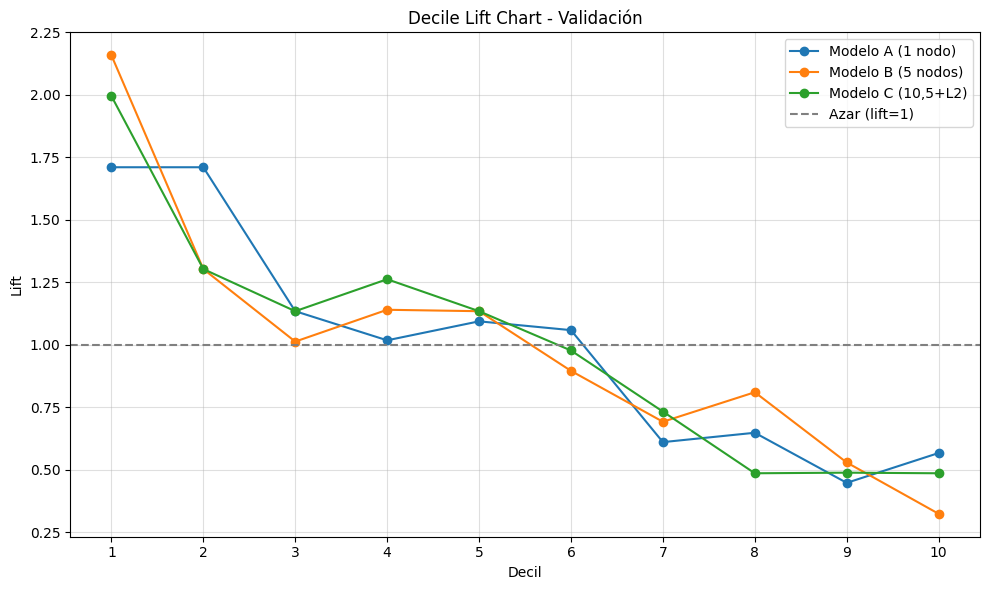

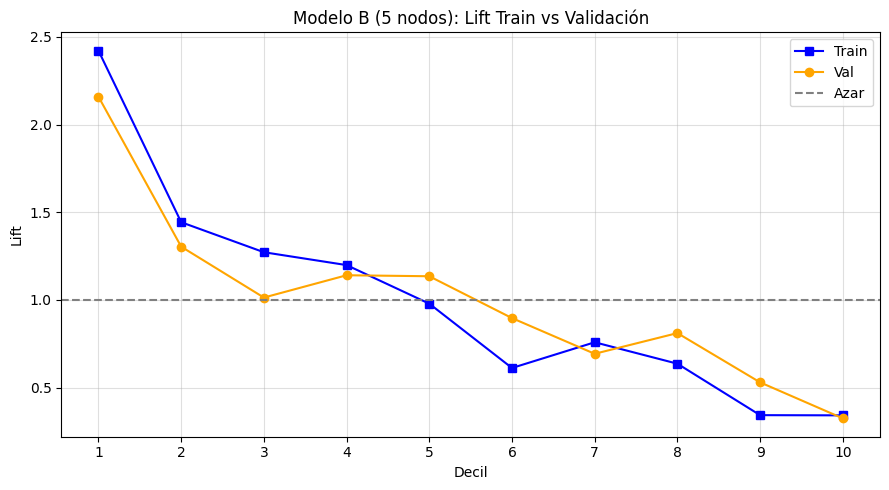


Modelo A (1 nodo)  →  Accuracy val: 0.877
              precision    recall  f1-score   support

   No compra       0.88      1.00      0.93      1748
      Compra       0.00      0.00      0.00       246

    accuracy                           0.88      1994
   macro avg       0.44      0.50      0.47      1994
weighted avg       0.77      0.88      0.82      1994


Modelo B (5 nodos)  →  Accuracy val: 0.877
              precision    recall  f1-score   support

   No compra       0.88      1.00      0.93      1748
      Compra       0.00      0.00      0.00       246

    accuracy                           0.88      1994
   macro avg       0.44      0.50      0.47      1994
weighted avg       0.77      0.88      0.82      1994


Modelo C (10,5+L2)  →  Accuracy val: 0.877
              precision    recall  f1-score   support

   No compra       0.88      1.00      0.93      1748
      Compra       1.00      0.00      0.01       246

    accuracy                           0.88      19

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USUARIO\anaco

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns 
# 1. CARGA Y PREPROCESAMIENTO 
df        = pd.read_csv("EastWestAirlinesNN.csv")                       #  datos
df        = df.dropna(subset=['Phone_sale'])                             # eliminar filas sin target
X         = df.drop(columns=['Phone_sale'])                              # features
y         = df['Phone_sale'].astype(int)                                 # target binario 0/1

X         = pd.get_dummies(X, drop_first=True)                          # dummies para categóricas
X         = X.fillna(X.median(numeric_only=True))                       # se imputa NaN con mediana
scaler    = MinMaxScaler()                                               # escala [0,1]

X_train, X_val, y_train, y_val = train_test_split(                      # 60% train / 40% val
    X, y, test_size=0.4, random_state=42
)
X_train = scaler.fit_transform(X_train)                                 # ajustar y transformar train
X_val   = scaler.transform(X_val)                                       # solo transformar val

# 2. TRES MODELOS   ,Se usa Precision/Recall/F1 o Lift Chart ,que son más apropiados. 
modelo_a  = MLPClassifier(hidden_layer_sizes=(1,),   max_iter=1000, random_state=42)         # underfitting: 1 nodo
modelo_b  = MLPClassifier(hidden_layer_sizes=(5,),   max_iter=1000, random_state=42)         # base: 5 nodos
modelo_c  = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000, alpha=0.01,              # deep + L2
                          random_state=42)

modelo_a.fit(X_train, y_train)                                          # entrenar A
modelo_b.fit(X_train, y_train)                                          # entrenar B
modelo_c.fit(X_train, y_train)                                          # entrenar C
# 3. DECILE LIFT CHART
# ============================================================
def calcular_lift(modelo, X, y, titulo="Lift Chart"):
    probs      = modelo.predict_proba(X)[:, 1]                          # probabilidad clase 1
    df_res     = pd.DataFrame({'actual': np.array(y), 'prob': probs})
    df_res     = df_res.sort_values('prob', ascending=False).reset_index(drop=True)
    n          = len(df_res)
    tasa_base  = df_res['actual'].mean()                                 # % real de compras (13%)
    lift_vals  = []
    for d in range(10):                                                  # 10 deciles
        ini  = int(d     * n / 10)
        fin  = int((d+1) * n / 10)
        dec  = df_res.iloc[ini:fin]
        tasa = dec['actual'].mean()                                      # tasa en ese decil
        lift = tasa / tasa_base if tasa_base > 0 else 0                 # lift = tasa_decil / tasa_base
        lift_vals.append(lift)
    return lift_vals
#-------------------------------------------------
def graficar_lift(modelos_dict, X, y, titulo="Decile Lift Chart - Validación"):
    plt.figure(figsize=(10, 6))
    for nombre, modelo in modelos_dict.items():
        lifts = calcular_lift(modelo, X, y)
        plt.plot(range(1, 11), lifts, marker='o', label=nombre)         # grafica por decil
    plt.axhline(y=1, color='gray', linestyle='--', label='Azar (lift=1)')
    plt.xlabel('Decil')
    plt.ylabel('Lift')
    plt.title(titulo)
    plt.xticks(range(1, 11))
    plt.legend()
    plt.grid(True, alpha=0.4)
    plt.tight_layout()
    plt.show()

modelos  = {'Modelo A (1 nodo)':  modelo_a,
            'Modelo B (5 nodos)': modelo_b,
            'Modelo C (10,5+L2)': modelo_c}

graficar_lift(modelos, X_val, y_val)                                    # lift en validación 
# 4. OVERFITTING: LIFT TRAIN vs VAL → Modelo B 
lifts_train = calcular_lift(modelo_b, X_train, y_train)                 # lift sobre entrenamiento
lifts_val   = calcular_lift(modelo_b, X_val,   y_val)                   # lift sobre validación

plt.figure(figsize=(9, 5))
plt.plot(range(1,11), lifts_train, marker='s', label='Train',  color='blue')
plt.plot(range(1,11), lifts_val,   marker='o', label='Val',    color='orange')
plt.axhline(y=1, color='gray', linestyle='--', label='Azar')
plt.xlabel('Decil')
plt.ylabel('Lift')
plt.title('Modelo B (5 nodos): Lift Train vs Validación')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
# Si lift_train >> lift_val en el primer decil → overfitting
# El modelo memorizó el train pero no generaliza a datos nuevos. 
#  MÉTRICAS FINALES DE CADA MODELO 
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_val)
    acc    = accuracy_score(y_val, y_pred)
    print(f"\n{nombre}  →  Accuracy val: {acc:.3f}")
    print(classification_report(y_val, y_pred, target_names=['No compra','Compra']))

# ============================================================
# 6. PESOS MODELO A  (1 nodo → interpretable como regresión logística)
# ============================================================
print("\n--- Pesos Modelo A (1 nodo) ---")
print(f"W1 (features→oculta):  {modelo_a.coefs_[0].flatten()}")        # un peso por feature
print(f"W2 (oculta→salida):    {modelo_a.coefs_[1].flatten()}")

# Con 1 nodo la red es casi lineal; los pesos W1 indican importancia relativa.
# Con 10 nodos la interpretación directa se pierde: cada feature contribuye a 10 nodos en paralelo → no hay un peso único por variable. 
# PREGUNTAS 
#
#a. (Interpretación de Negocio): Si el primer decil del gráfico de elevación (lift) en validación tiene un valor de 3.5, ¿qué significa esto para el director de marketing si decide enviar correos solo al 10% de los clientes con mayor puntaje?
#
# a. Primer decil lift=3.5 → al enviar correos al 10% mejor rankeado
#    se obtienen 3.5x más compras que si se eligiera al azar.
#    Marketing gasta 10% del presupuesto y capta 35% de los compradores.
#
# b. (Comparación de Modelos):** ¿Cómo cambia la forma del Lift Chart al pasar de 1 nodo a 5 nodos? ¿Por qué el modelo de 1 nodo se comporta de forma similar a una Regresión Logística?

# b. 1 nodo ≈ Regresión Logística: solo puede aprender una frontera lineal.
#    5 nodos → curva más flexible → lift más alto en primer decil.
#
# **c. (Matemáticas de la Red):** Extrae los pesos (weights) del modelo con 1 nodo. ¿Qué información proporcionan estos pesos sobre la importancia de las variables? ¿Es posible interpretar los pesos del modelo de 10 nodos con la misma facilidad? Justifica tu respuesta.
#
# c. Con 1 nodo : hay un unico W[i] por variable entonces su magnitud indica cuanto influye esa variable.
#    Con 10 nodos : como W1 es nX10 , cada variable tiene 10 pesos,uno hacia cada nodo, con signos y magntinudes distintos, no existe un unico valor que resuma
#    su importancia.
# **d. (Criterio de Parada):** Durante el entrenamiento del modelo más complejo, observas que la pérdida (loss) en entrenamiento sigue bajando, pero la pérdida en validación empieza a subir tras 50 épocas. ¿Cómo se llama este fenómeno y qué técnica (además de la regularización L2) implementarías para detener el entrenamiento en el momento óptimo?
# 
# d. el fenomeno es: Early Stopping. Técnica: monitorear loss en val y detener
#    y cuando empieza a subir (sklearn: early_stopping=True, validation_fraction=0.1).
# ============================================================
 


Mejor → k=2  métrica=euclidean  RMSE=3.8596


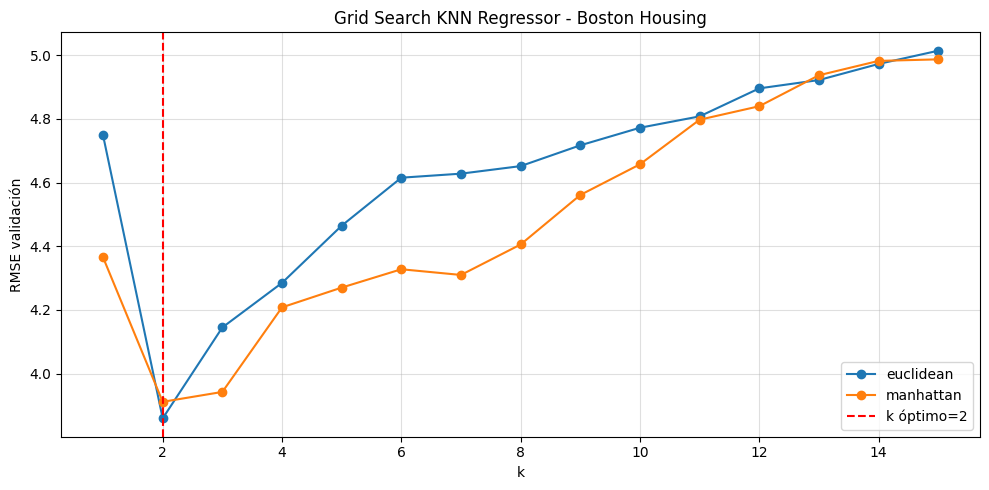


Columnas X2 (13): ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

Predicción MEDV: $19.55k

Tiempos de predicción en validación:
  brute        → 5.1544 ms
  kd_tree      → 3.3348 ms
  ball_tree    → 3.7651 ms

Análisis leaf_size (kd_tree):
  leaf_size=2    → 7.5598 ms   RMSE=3.8596
  leaf_size=30   → 4.4222 ms   RMSE=3.8596
  leaf_size=100  → 5.3782 ms   RMSE=3.8596
  leaf_size=500  → 4.2160 ms   RMSE=3.8596


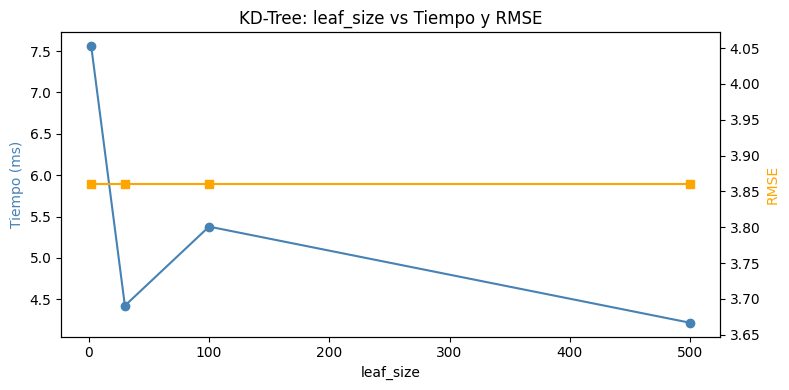

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
 
# 1. CARGA Y LIMPIEZA 
df2        = pd.read_csv("BostonHousing.csv")
cols_drop  = [c for c in ['CAT..MEDV', 'CAT.MEDV'] if c in df2.columns] # ignorar medv
target_col = 'medv' if 'medv' in df2.columns else 'medv'                 
X2         = df2.drop(columns=[target_col] + cols_drop)                 # features
y2         = df2[target_col]                                             # target: precio mediano

X2_train, X2_val, y2_train, y2_val = train_test_split(                     # 60% train / 40% val
    X2, y2, test_size=0.4, random_state=42
)
  
scaler2     = StandardScaler()
X2_train_sc = scaler2.fit_transform(X2_train)                             
X2_val_sc   = scaler2.transform(X2_val)                                   
 
# PARTE 1a.   métrica (euclidiana, manhattan) 
resultados = []
for k in range(1, 16):                                                    # k de 1 a 15
    for p, nombre in [(2, 'euclidean'), (1, 'manhattan')]:
        knn    = KNeighborsRegressor(n_neighbors=k, p=p)
        knn.fit(X2_train_sc, y2_train)
        y_pred = knn.predict(X2_val_sc)
        rmse   = root_mean_squared_error(y2_val, y_pred)                  # validación Rmse
        resultados.append({'k': k, 'metrica': nombre, 'rmse': rmse})

df_res = pd.DataFrame(resultados)
mejor  = df_res.loc[df_res['rmse'].idxmin()]                              # combinación óptima
print(f"\nMejor → k={int(mejor['k'])}  métrica={mejor['metrica']}  RMSE={mejor['rmse']:.4f}")

plt.figure(figsize=(10, 5))
for metrica, grupo in df_res.groupby('metrica'):
    plt.plot(grupo['k'], grupo['rmse'], marker='o', label=metrica)        # RMSE por k y métrica
plt.axvline(x=int(mejor['k']), color='red', linestyle='--',
            label=f"k óptimo={int(mejor['k'])}")
plt.xlabel('k')
plt.ylabel('RMSE validación')
plt.title('Grid Search KNN Regressor - Boston Housing')
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
# si k=1 entonces el  error de entrenamiento = 0: pues cada punto es su propio vecino más cercano.
# Esto provoca que en  la validación el modelo no generalice por consiguiente hay alta varianza .
 
# PARTE 1b. PREDICCIÓN CASO ESPECÍFICO 
k_opt   = int(mejor['k'])
p_opt   = 2 if mejor['metrica'] == 'euclidean' else 1

knn_opt = KNeighborsRegressor(n_neighbors=k_opt, p=p_opt)                # modelo óptimo
knn_opt.fit(X2_train_sc, y2_train)

print(f"\nColumnas X2 ({len(X2.columns)}): {list(X2.columns)}")            

caso_vals = {'crim':0.2,'zn':0,'indus':7,'chas':0,'nox':0.538,          # valores del inciso
             'rm':6,'age':62,'dis':4.7,'rad':4,'tax':307,
             'ptratio':21,'b':391.0,'lstat':10}                           
caso_row  = [caso_vals.get(c.lower(), 0) for c in X2.columns]           # por nombre de columna
caso      = pd.DataFrame([caso_row], columns=X2.columns)                 # mismo orden de columnas
caso_sc   = scaler2.transform(caso)                                       #  misma escala del train
pred      = knn_opt.predict(caso_sc)
print(f"\nPredicción MEDV: ${pred[0]:.2f}k") 

# PARTE 2c.   #fuerza bruta vs kd_tree vs ball_tree

algoritmos = ['brute', 'kd_tree', 'ball_tree']               
tiempos    = {}

for alg in algoritmos:
    knn_alg = KNeighborsRegressor(n_neighbors=k_opt, p=p_opt, algorithm=alg)
    knn_alg.fit(X2_train_sc, y2_train)
    t0           = time.time()
    knn_alg.predict(X2_val_sc)                                            #  tiempo predicción
    tiempos[alg] = (time.time() - t0) * 1000                             #  a ms

print("\nTiempos de predicción en validación:")
for alg, ms in tiempos.items():
    print(f"  {alg:<12} → {ms:.4f} ms")

# Con 1M registros y 50 features:
# - kd_tree falla primero: sufre la 'Maldición de la Dimensionalidad'.
#   En alta dimensión todos los puntos están aprox. igual de lejos;
#   la poda por hiperplanos no descarta nodos termina degenerando en fuerza bruta.
# - ball_tree resiste mejor (poda por radio de bola), pero también se degrada.
# - fuerza bruta siempre es O(n·d) sin importar la dimensión.
 
# PARTE 2d.  en kd_tree 
hojas_sizes = [2, 30, 100, 500]
tiempos_ls = []
rmse_ls    = []

print("\nAnálisis leaf_size (kd_tree):")
for ls in hojas_sizes:
    knn_ls  = KNeighborsRegressor(n_neighbors=k_opt, p=p_opt,
                                  algorithm='kd_tree', leaf_size=ls)
    knn_ls.fit(X2_train_sc, y2_train)
    t0      = time.time()
    pred_ls = knn_ls.predict(X2_val_sc)
    ms      = (time.time() - t0) * 1000                                   # ms
    rmse    = root_mean_squared_error(y2_val, pred_ls)                    # misma función corregida
    tiempos_ls.append(ms)
    rmse_ls.append(rmse)
    print(f"  leaf_size={ls:<4} → {ms:.4f} ms   RMSE={rmse:.4f}")

fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(hojas_sizes, tiempos_ls, marker='o', color='steelblue', label='Tiempo (ms)')
ax1.set_xlabel('leaf_size')
ax1.set_ylabel('Tiempo (ms)', color='steelblue')
ax2 = ax1.twinx()
ax2.plot(hojas_sizes, rmse_ls, marker='s', color='orange', label='RMSE')
ax2.set_ylabel('RMSE', color='orange')
plt.title('KD-Tree: leaf_size vs Tiempo y RMSE')
plt.tight_layout()
plt.show()

# leaf_size pequeño implica un árbol más profundo → más nodos internos → más memoria.
# leaf_size grande implica menos nodos internos pero más comparaciones en hojas.
# El RMSE NO cambia: leaf_size solo controla la estructura del árbol, no cuáles vecinos se encuentran → se tendra un resultado de predicción idéntico.


# PREGUNTAS PARTE 3:
# e. Al usar el mismo conjunto de validación para elegir el mejor k, el modelo "ve" ese conjunto durante la selección de hiperparámetros. El k elegido es el que mejor se ajusta a *ese* conjunto específico, no a datos realmente nuevos → la  estimación es cercano al real .
#   La solución es Nested Cross-Validation : el loop externo estima el error real sobre datos no vistos; el loop interno selecciona k usando solo datos de entrenamiento de ese dato.



# f. 1. # ¿Cuál es la principal desventaja de K-NN frente a una Regresión Lineal en términos de almacenamiento de memoria?
#        MEMORIA: KNN guarda todo el dataset (es un lazy learner como se mencionó en clase).
#       Regresión Lineal solo guarda n_features pesos → mínima RAM.
#        
#    2. ¿Cuál es la desventaja en términos de tiempo de cómputo (latencia) durante la fase de predicción?
#       LATENCIA: cada predicción calcula distancias contra todos los puntos → la complejidad  es O(n·d).
#       Regresión Lineal: un producto punto  → la complejidad es  O(columnas/d/dimension).  
#  
#   3. ¿Cómo ayuda un KD-Tree a mitigar esto y cuál es su límite?
#       KD-Tree reduce búsqueda a O(log n) Pero su  Límite es la "maldicion de la dimensionalidad"
#       con 50 features la poda falla → vuelve a O(n·d) sin ventaja sobre fuerza bruta.